## Async Exercise: Health sites near you

Names: Gayeta, Joana Feliz <br> Section: DATAPRE-N01

---

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Read shapefile
ph = gpd.read_file('gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

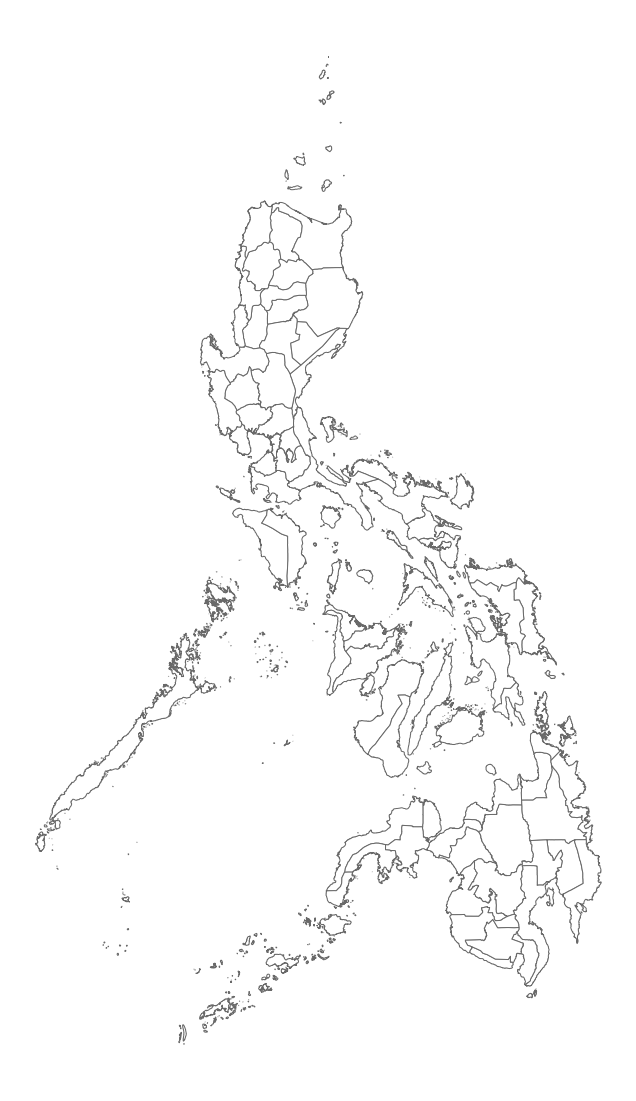

In [5]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

In [6]:
# Read GeoJSON file
healthsites = gpd.read_file('philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [7]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


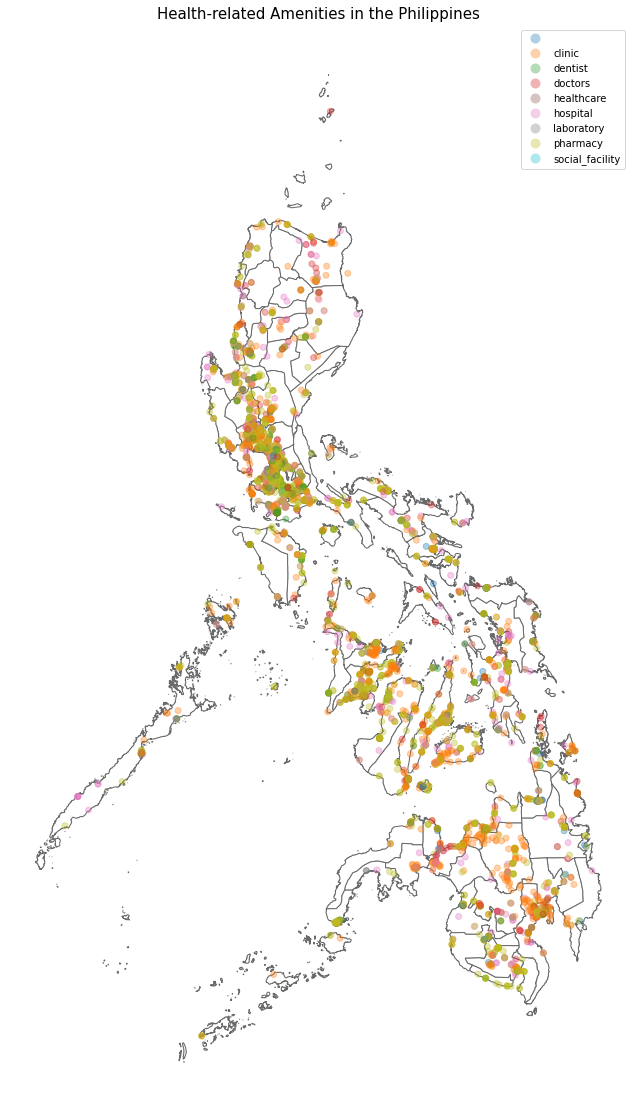

In [8]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [9]:
healthsites.describe(include=np.object)

<ipython-input-9-6f105f861a18>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  healthsites.describe(include=np.object)


,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,...,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,...,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,...,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,...,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,...,10404,1904,10327,10399,10404,9647,6405,9330,1,1


In [10]:
healthsites.isna().sum()

osm_id                     0
osm_type                   0
completeness               0
is_in_health_zone          0
amenity                    0
speciality                 0
addr_street                0
operator                   0
water_source               0
changeset_id              40
insurance                  0
staff_doctors              0
contact_number             0
uuid                       0
electricity                0
opening_hours              0
operational_status         0
source                     0
is_in_health_area          0
health_amenity_type        0
changeset_version         40
emergency                  0
changeset_timestamp       40
addr_housenumber           0
addr_postcode              0
addr_city                  0
name                       0
staff_nurses               0
changeset_user            40
wheelchair                 0
beds                       0
url                        0
dispensing                 0
healthcare                 0
operator_type 

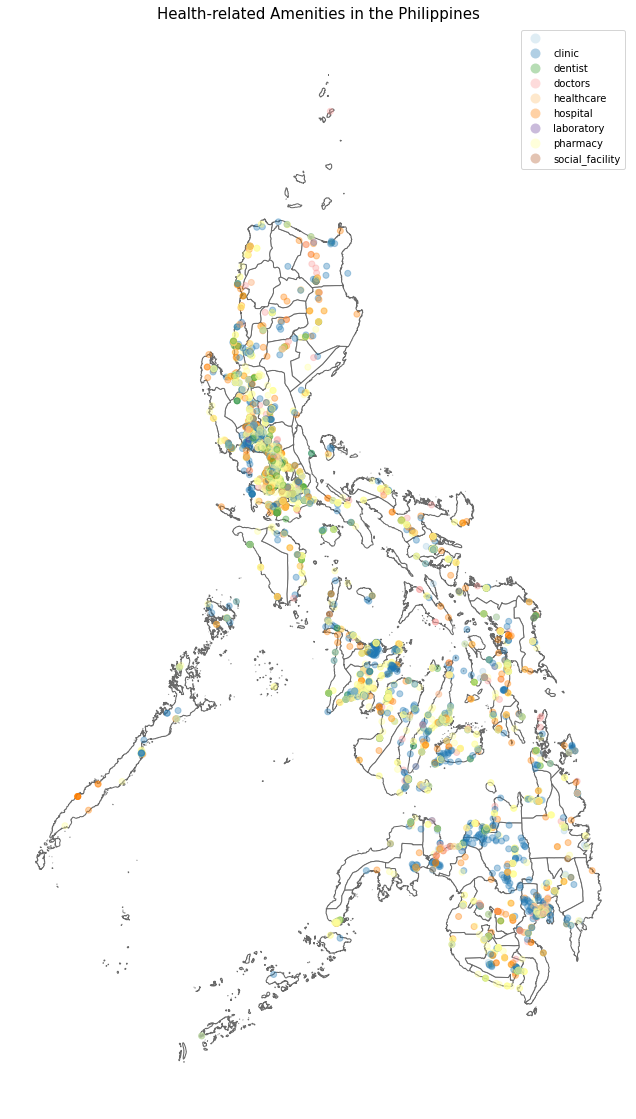

In [11]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

### Merge Data

In [12]:
hs_merged = gpd.sjoin(healthsites, ph, op='within')
hs_merged.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
200,4196852283,node,6.0,,clinic,,,,,39446699.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
225,4900961821,node,9.0,,clinic,,,,,49324674.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
402,4728751605,node,9.0,,pharmacy,,,,,46755569.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
405,4812503217,node,9.0,,clinic,,,,,55569745.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II


In [13]:
#store ameneties in one array
healthsites.amenity.unique()

array(['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist', '',
       'laboratory', 'social_facility', 'healthcare'], dtype=object)

---

## Batangas Health Sites

<AxesSubplot:>

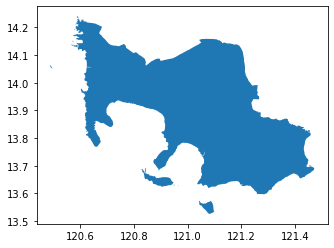

In [43]:
bats = ph[ph.NAME_1=="Batangas"]
bats.plot()

In [63]:
#Get total per amenity
batsAmenities = hs_merged[hs_merged.NAME_1=="Batangas"]
bats_phar = batsAmenities[batsAmenities.amenity=="pharmacy"]
bats_doctors = batsAmenities[ batsAmenities.amenity=="doctors"]
bats_hospital = batsAmenities[ batsAmenities.amenity=="hospital"]
bats_clinic =  batsAmenities[ batsAmenities.amenity=="clinic"]
bats_dentist =  batsAmenities[ batsAmenities.amenity=="dentist"]
bats_laboratory =  batsAmenities[ batsAmenities.amenity=="laboratory"]
bats_socfac =  batsAmenities[ batsAmenities.amenity=="social_facility"]
bats_healthcare =  batsAmenities[ batsAmenities.amenity=="healthcare"]
bats_unknown =  batsAmenities[ batsAmenities.amenity==""]

batsTable =  batsAmenities["amenity"].value_counts().rename_axis('amenity').reset_index(name='counts')
batsTable

,amenity,counts
0,pharmacy,114
1,hospital,87
2,dentist,67
3,clinic,55
4,doctors,35
5,,17
6,social_facility,1


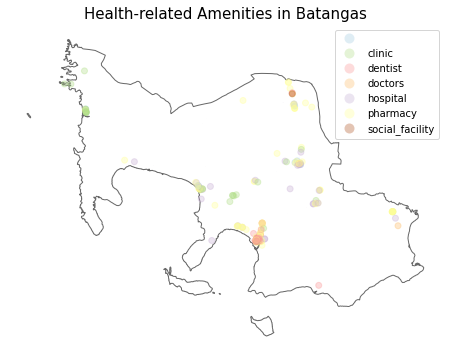

In [20]:
#Create Graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

bats.plot(ax=ax, color='white', edgecolor='dimgray')
batsAmenities.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Batangas', fontsize=15)
ax.axis('off');


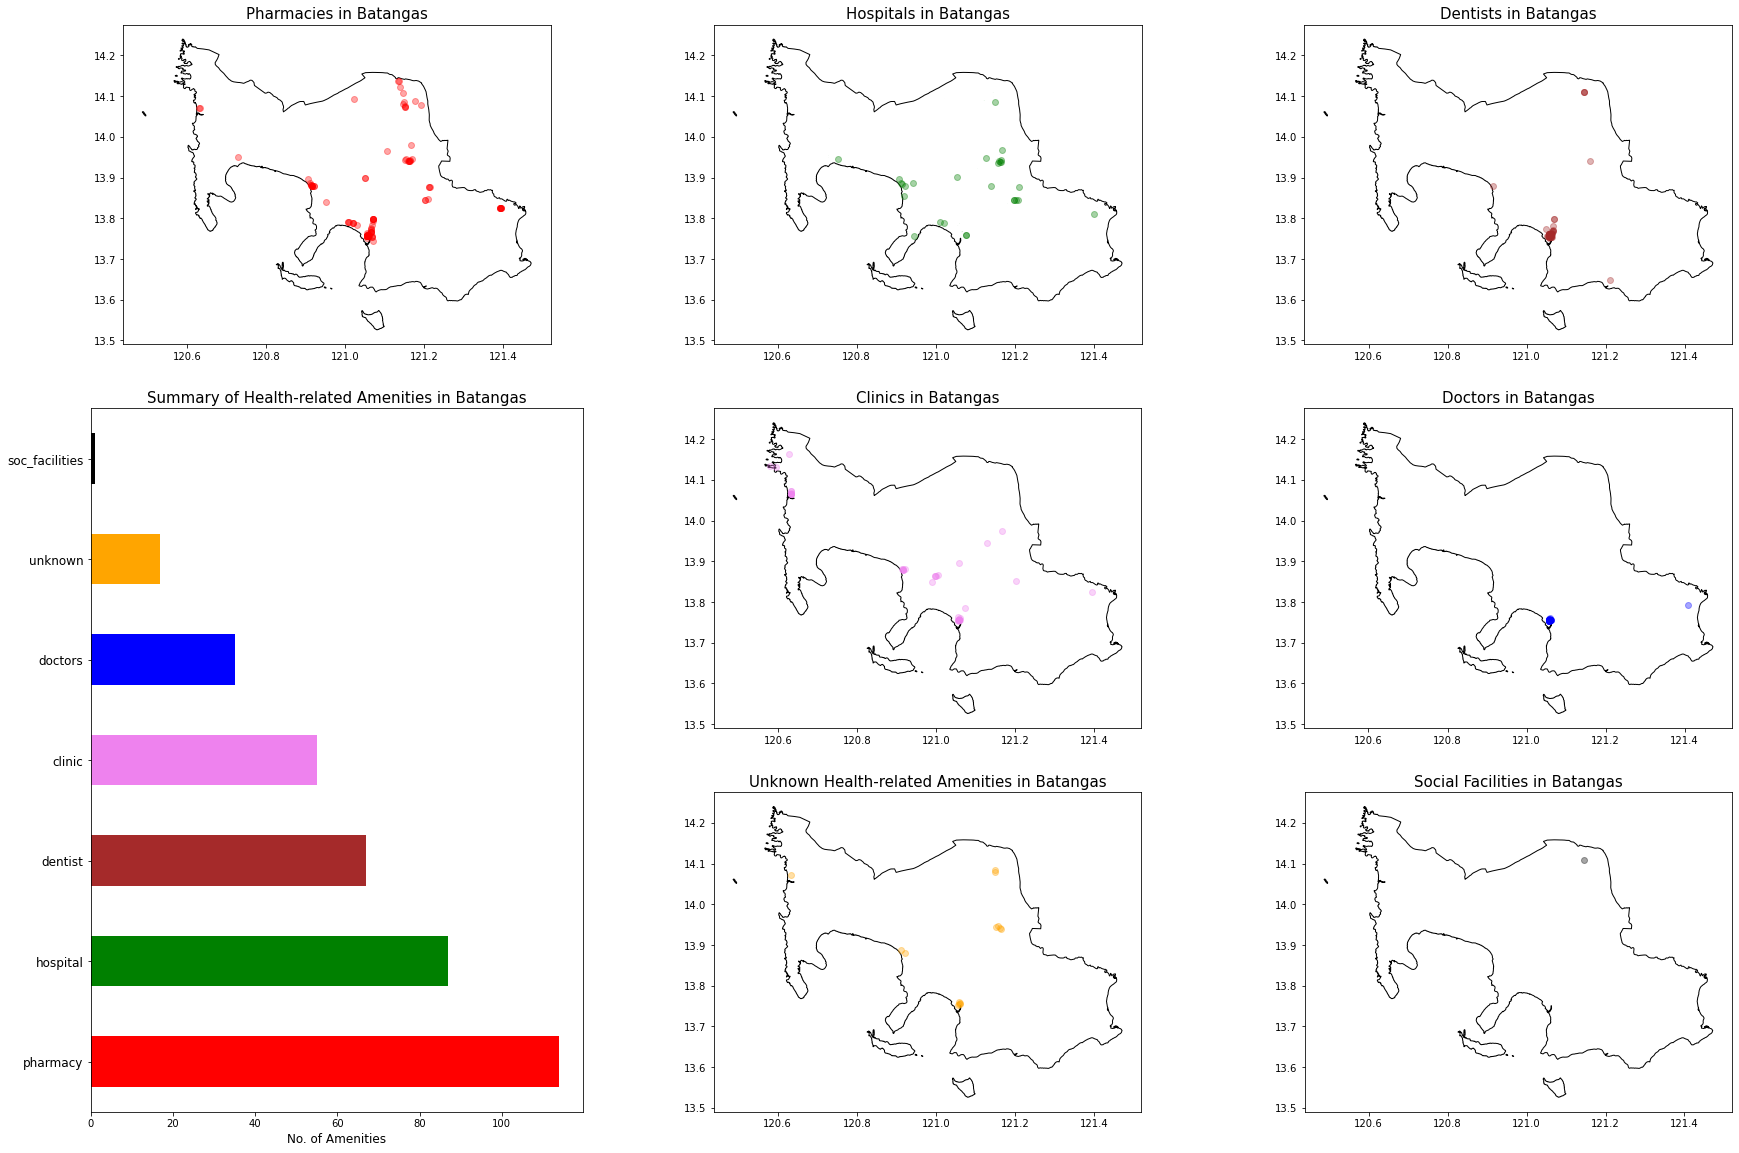

In [89]:
#Create graph per Amenity 

fig = plt.figure(figsize=(30, 20))
ax = fig.add_gridspec(3,3)
phar = fig.add_subplot(ax[0, 0])
doctors = fig.add_subplot(ax[1, 2])
hospital = fig.add_subplot(ax[0, 1])
clinic = fig.add_subplot(ax[1, 1])
dentist = fig.add_subplot(ax[0, 2])
socfac = fig.add_subplot(ax[2, 2])
unknown = fig.add_subplot(ax[2, 1])
bar = fig.add_subplot(ax[1:3, 0])


#Pharmacies
bats.plot(ax=phar, color='white', edgecolor='black')
bats_phar.plot(ax=phar, color="red", alpha=0.35, legend=True)
phar.set_title('Pharmacies in Batangas', fontsize=15)


#Doctors
bats.plot(ax=doctors, color='white', edgecolor='black')
bats_doctors.plot(ax=doctors, color="blue", alpha=0.35, legend=True)
doctors.set_title('Doctors in Batangas', fontsize=15)


#hospital
bats.plot(ax=hospital, color='white', edgecolor='black')
bats_hospital.plot(ax=hospital, color="green", alpha=0.35, legend=True)
hospital.set_title('Hospitals in Batangas', fontsize=15)



#clinic
bats.plot(ax=clinic, color='white', edgecolor='black')
bats_clinic.plot(ax=clinic, color="violet", alpha=0.35, legend=True)
clinic.set_title('Clinics in Batangas', fontsize=15)

#dentist
bats.plot(ax=dentist, color='white', edgecolor='black')
bats_dentist.plot(ax=dentist, color="brown", alpha=0.35, legend=True)
dentist.set_title('Dentists in Batangas', fontsize=15)


#Social Facilities
bats.plot(ax=socfac, color='white', edgecolor='black')
bats_socfac.plot(ax=socfac, color="black", alpha=0.35, legend=True)
socfac.set_title('Social Facilities in Batangas', fontsize=15)



#unknown
bats.plot(ax=unknown, color='white', edgecolor='black')
bats_unknown.plot(ax=unknown, color="orange", alpha=0.35, legend=True)
unknown.set_title('Unknown Health-related Amenities in Batangas', fontsize=15)

#bar summary
bats_bar = batsTable['counts'].plot(ax=bar, kind='barh',color=["red", "green", "brown", "violet", "blue", "orange", "black"], width=0.5)

bar.set_yticklabels(['pharmacy','hospital','dentist','clinic','doctors','unknown','soc_facilities'], rotation=0, fontsize=12)
bar.set_title('Summary of Health-related Amenities in Batangas', fontsize=15)
bar.set_xlabel('No. of Amenities', fontsize=12);



In [82]:
fig.savefig('Batangas.png', bbox_inches='tight')

### Metro Manila Health Sites

<AxesSubplot:>

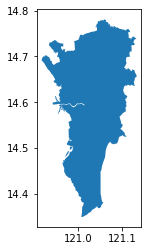

In [84]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot()

In [86]:
#Get total per amenity
mmAmenities = hs_merged[hs_merged.NAME_1=="Metropolitan Manila"]
mm_phar = mmAmenities[mmAmenities.amenity=="pharmacy"]
mm_doctors = mmAmenities[ mmAmenities.amenity=="doctors"]
mm_hospital = mmAmenities[ mmAmenities.amenity=="hospital"]
mm_clinic =  mmAmenities[ mmAmenities.amenity=="clinic"]
mm_dentist =  mmAmenities[ mmAmenities.amenity=="dentist"]
mm_laboratory =  mmAmenities[ mmAmenities.amenity=="laboratory"]
mm_socfac =  mmAmenities[ mmAmenities.amenity=="social_facility"]
mm_healthcare =  mmAmenities[ mmAmenities.amenity=="healthcare"]
mm_unknown =  mmAmenities[ mmAmenities.amenity==""]

mmTable =  mmAmenities["amenity"].value_counts().rename_axis('amenity').reset_index(name='counts')
mmTable


,amenity,counts
0,pharmacy,957
1,clinic,532
2,hospital,286
3,dentist,228
4,,160
5,doctors,53
6,healthcare,1


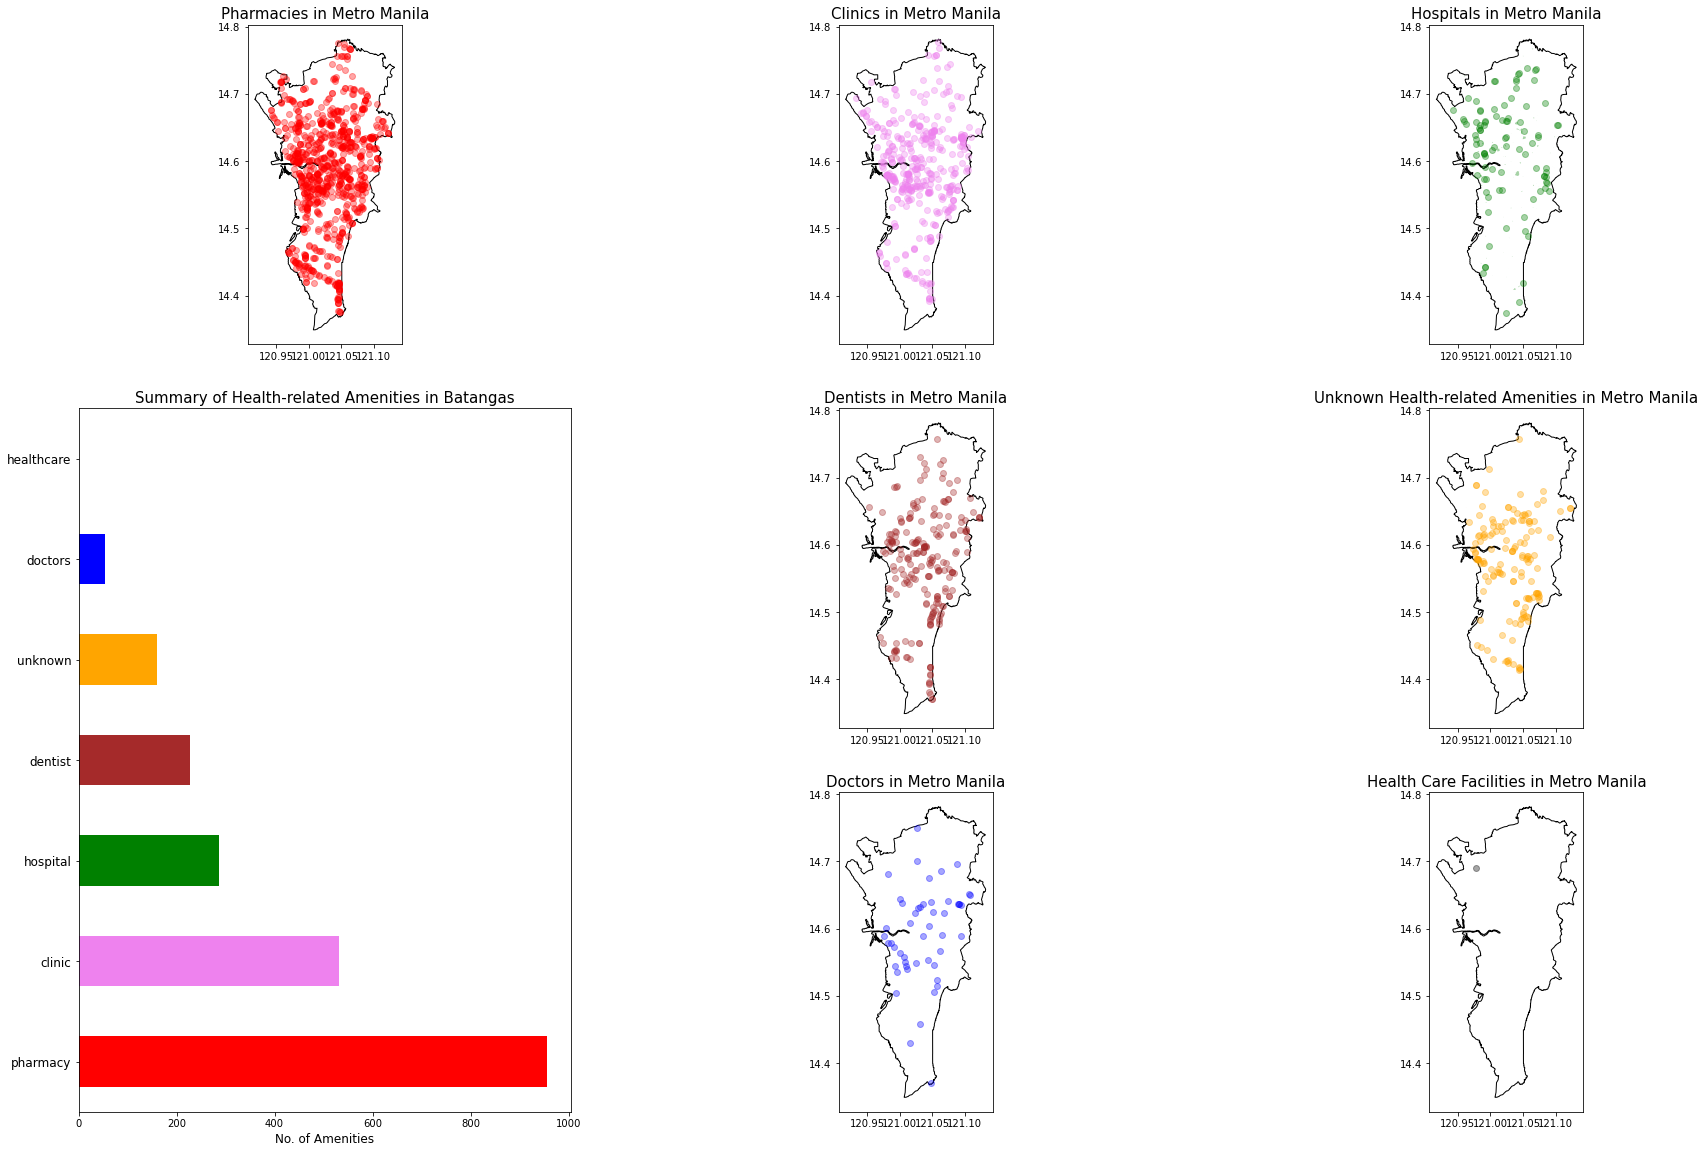

In [90]:
#Create graph per Amenity 

fig = plt.figure(figsize=(30, 20))
ax = fig.add_gridspec(3,3)
phar = fig.add_subplot(ax[0, 0])
doctors = fig.add_subplot(ax[2, 1])
hospital = fig.add_subplot(ax[0, 2])
clinic = fig.add_subplot(ax[0, 1])
dentist = fig.add_subplot(ax[1, 1])
healthcare = fig.add_subplot(ax[2, 2])
unknown = fig.add_subplot(ax[1, 2])
bar = fig.add_subplot(ax[1:3, 0])

#Pharmacies
mm.plot(ax=phar, color='white', edgecolor='black')
mm_phar.plot(ax=phar, color="red", alpha=0.35, legend=True)
phar.set_title('Pharmacies in Metro Manila', fontsize=15)


#clinic
mm.plot(ax=clinic, color='white', edgecolor='black')
mm_clinic.plot(ax=clinic, color="violet", alpha=0.35, legend=True)
clinic.set_title('Clinics in Metro Manila', fontsize=15)


#hospital
mm.plot(ax=hospital, color='white', edgecolor='black')
mm_hospital.plot(ax=hospital, color="green", alpha=0.35, legend=True)
hospital.set_title('Hospitals in Metro Manila', fontsize=15)


#dentist
mm.plot(ax=dentist, color='white', edgecolor='black')
mm_dentist.plot(ax=dentist, color="brown", alpha=0.35, legend=True)
dentist.set_title('Dentists in Metro Manila', fontsize=15)


#unknown
mm.plot(ax=unknown, color='white', edgecolor='black')
mm_unknown.plot(ax=unknown, color="orange", alpha=0.35, legend=True)
unknown.set_title('Unknown Health-related Amenities in Metro Manila', fontsize=15)


#Doctors
mm.plot(ax=doctors, color='white', edgecolor='black')
mm_doctors.plot(ax=doctors, color="blue", alpha=0.35, legend=True)
doctors.set_title('Doctors in Metro Manila', fontsize=15)

#HealthCare
mm.plot(ax=healthcare, color='white', edgecolor='black')
mm_healthcare.plot(ax=healthcare, color="black", alpha=0.35, legend=True)
healthcare.set_title('Health Care Facilities in Metro Manila', fontsize=15)

#bar summary
mm_bar = mmTable['counts'].plot(ax=bar, kind='barh',color=["red", "violet", "green", "brown","orange", "blue",  "black"], width=0.5)

bar.set_yticklabels(['pharmacy','clinic','hospital','dentist','unknown','doctors','healthcare'], rotation=0, fontsize=12)
bar.set_title('Summary of Health-related Amenities in Metro Manila', fontsize=15)
bar.set_xlabel('No. of Amenities', fontsize=12);


In [91]:
fig.savefig('Metro Manila.png', bbox_inches='tight')

### Romblon Health Sites

<AxesSubplot:>

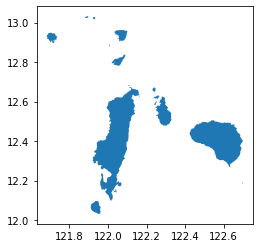

In [93]:
romblon = ph[ph.NAME_1=="Romblon"]
romblon.plot()

In [94]:
#Get total per amenity
romblonAmenities = hs_merged[hs_merged.NAME_1=="Romblon"]
romblon_phar = romblonAmenities[romblonAmenities.amenity=="pharmacy"]
romblon_doctors = romblonAmenities[ romblonAmenities.amenity=="doctors"]
romblon_hospital = romblonAmenities[ romblonAmenities.amenity=="hospital"]
romblon_clinic =  romblonAmenities[ romblonAmenities.amenity=="clinic"]
romblon_dentist =  romblonAmenities[ romblonAmenities.amenity=="dentist"]
romblon_laboratory =  romblonAmenities[ romblonAmenities.amenity=="laboratory"]
romblon_socfac =  romblonAmenities[ romblonAmenities.amenity=="social_facility"]
romblon_healthcare =  romblonAmenities[ romblonAmenities.amenity=="healthcare"]
romblon_unknown =  romblonAmenities[ romblonAmenities.amenity==""]

romblonTable =  romblonAmenities["amenity"].value_counts().rename_axis('amenity').reset_index(name='counts')
romblonTable


,amenity,counts
0,clinic,9
1,pharmacy,8
2,hospital,7
3,,1
4,doctors,1


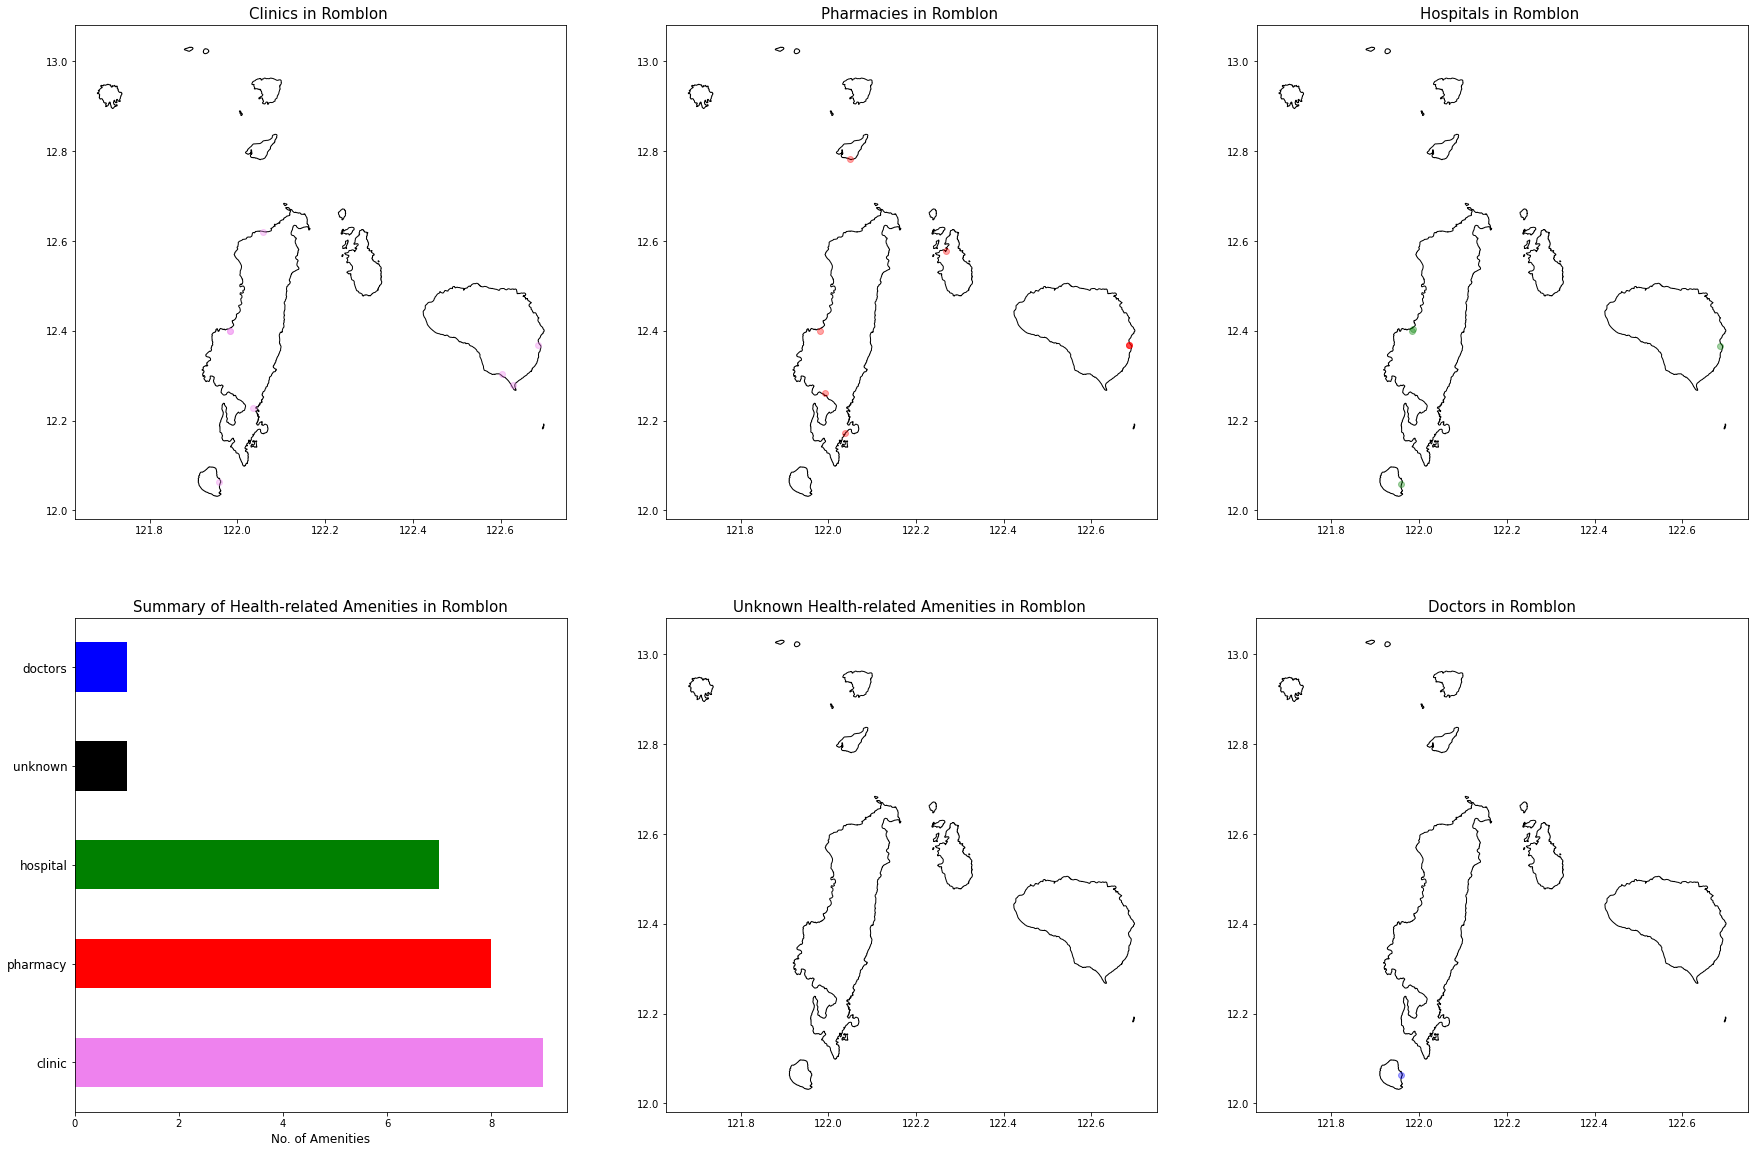

In [105]:
#Create graph per Amenity 

fig = plt.figure(figsize=(30, 20))
ax = fig.add_gridspec(2,3)
phar = fig.add_subplot(ax[0, 1])
doctors = fig.add_subplot(ax[1, 2])
hospital = fig.add_subplot(ax[0, 2])
clinic = fig.add_subplot(ax[0, 0])
unknown = fig.add_subplot(ax[1, 1])
bar = fig.add_subplot(ax[1, 0])


#clinic
romblon.plot(ax=clinic, color='white', edgecolor='black')
romblon_clinic.plot(ax=clinic, color="violet", alpha=0.35, legend=True)
clinic.set_title('Clinics in Romblon ', fontsize=15)

#Pharmacies
romblon.plot(ax=phar, color='white', edgecolor='black')
romblon_phar.plot(ax=phar, color="red", alpha=0.35, legend=True)
phar.set_title('Pharmacies in Romblon ', fontsize=15)

#hospital
romblon.plot(ax=hospital, color='white', edgecolor='black')
romblon_hospital.plot(ax=hospital, color="green", alpha=0.35, legend=True)
hospital.set_title('Hospitals in Romblon ', fontsize=15)

#unknown
romblon.plot(ax=unknown, color='white', edgecolor='black')
romblon_unknown.plot(ax=unknown, color="black", alpha=0.35, legend=True)
unknown.set_title('Unknown Health-related Amenities in Romblon ', fontsize=15)


#Doctors
romblon.plot(ax=doctors, color='white', edgecolor='black')
romblon_doctors.plot(ax=doctors, color="blue", alpha=0.35, legend=True)
doctors.set_title('Doctors in Romblon', fontsize=15)

#bar summary
romblon_bar = romblonTable['counts'].plot(ax=bar, kind='barh',color=["violet","red","green","black","blue"], width=0.5)

bar.set_yticklabels(['clinic','pharmacy','hospital','unknown','doctors'], rotation=0, fontsize=12)
bar.set_title('Summary of Health-related Amenities in Romblon', fontsize=15)
bar.set_xlabel('No. of Amenities', fontsize=12);


In [106]:
fig.savefig('Romblon.png', bbox_inches='tight')